# Problem 1

In [411]:
import pandas
import math

In [412]:
data = pandas.read_csv("kc_house_data.csv")
data = data.drop(["id", "date", "zipcode"], axis=1)

## Part A

In [413]:
data.mean()

price            540088.141767
bedrooms              3.370842
bathrooms             2.114757
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.390691
sqft_basement       291.509045
yr_built           1971.005136
yr_renovated         84.402258
lat                  47.560053
long               -122.213896
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64

In [414]:
data.max()

price            7.700000e+06
bedrooms         3.300000e+01
bathrooms        8.000000e+00
sqft_living      1.354000e+04
sqft_lot         1.651359e+06
floors           3.500000e+00
waterfront       1.000000e+00
view             4.000000e+00
condition        5.000000e+00
grade            1.300000e+01
sqft_above       9.410000e+03
sqft_basement    4.820000e+03
yr_built         2.015000e+03
yr_renovated     2.015000e+03
lat              4.777760e+01
long            -1.213150e+02
sqft_living15    6.210000e+03
sqft_lot15       8.712000e+05
dtype: float64

In [415]:
data.var()

price            1.347824e+11
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381703e+00
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
yr_built         8.627973e+02
yr_renovated     1.613462e+05
lat              1.919990e-02
long             1.983262e-02
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64

## Part B

In [416]:
data.corr()['price'].drop(['price'])

bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

### Correlation Coefficient
All features have a positive correlation and the biggest ones seem to be sqft_living, sqft_above, and grade followed by bathrooms and sqft_living15. 

# Problem 2

## Part A

In [417]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [418]:
train = pandas.read_csv("train.csv")
train = train.drop(["zipcode"], axis=1)
train = train.drop(train.columns[0], axis=1)

In [419]:
x = train.drop(['price'], axis=1)
y = train['price']

In [420]:
model = linear_model.LinearRegression()
model.fit(x, y)
model.coef_

array([-1.47042805e+04,  2.56877840e+04,  8.30842103e+01,  3.75929764e-01,
        1.55555810e+04,  7.15535170e+05,  6.30278980e+04,  1.88164028e+04,
        7.95346027e+04,  4.20104951e+01,  4.10737150e+01, -2.40066933e+03,
        4.36829418e+01,  5.53505032e+05, -7.42402712e+03,  6.80157923e+01,
       -5.15527568e-01])

In [421]:
pred = model.predict(x)
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
rse = math.sqrt(mean_squared_error(y, pred))
print("mse: {}, r^2: {}, rse: {}".format(mse, r2, rse))

mse: 31486167775.794872, r^2: 0.7265334318706018, rse: 177443.4213370416


## Part B

In [452]:
trainScaled = train.copy()
trainScaled = trainScaled - trainScaled.mean()
trainScaled = trainScaled / trainScaled.std()

In [453]:
x_scaled = trainScaled.drop(['price'], axis=1)
y_scaled = trainScaled['price']
modelScaled = linear_model.LinearRegression()
modelScaled.fit(x_scaled, y_scaled)
modelScaled.coef_

array([-4.27106556e-02,  5.78674496e-02, -6.49597640e+12,  3.10876091e-02,
        2.39523529e-02,  1.87565475e-01,  1.42141920e-01,  3.92609015e-02,
        2.72242854e-01,  5.78010557e+12,  3.29871342e+12, -2.00223703e-01,
        5.15966007e-02,  2.32731749e-01, -1.31850540e-03,  1.31589596e-01,
       -3.82068419e-02])

In [454]:
pred_scaled = modelScaled.predict(x_scaled)
mse = mean_squared_error(y_scaled, pred_scaled)
r2 = r2_score(y_scaled, pred_scaled)
rse = math.sqrt(mean_squared_error(y_scaled, pred_scaled))
print("mse: {}, r^2: {}, rse: {}".format(mse, r2, rse))

mse: 0.2732457258827541, r^2: 0.726480754872115, rse: 0.522729113291726


### Comparing the models

In comparison to the other model, this one has about the same r^2 value, but the MSE is much lower. This is becaues all the features were scaled so  the large MSE before was attributed to the large response values

## Part C

In [470]:
test = pandas.read_csv("test.csv")
test = test.drop(["id", "date", "zipcode"], axis=1)
test = test.drop(test.columns[0], axis=1)
testScaled = test.copy()
testScaled = testScaled - train.mean()
testScaled = testScaled / train.std()

In [471]:
x_test = test.drop(["price"], axis=1)
y_test = test["price"]
x_test_scaled = testScaled.drop(["price"], axis=1)
y_test_scaled = testScaled["price"]

In [472]:
y_test_pred = model.predict(x_test)
y_test_scaled_pred = modelScaled.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
rse = math.sqrt(mse)
print("non scaled model\nmse: {}, r^2: {}, rse: {}\n".format(mse, r2, rse))
mseScaled = mean_squared_error(y_test_scaled, y_test_scaled_pred)
r2Scaled = r2_score(y_test_scaled, y_test_scaled_pred)
rseScaled = math.sqrt(mseScaled)
print("scaled model\nmse: {}, r^2: {}, rse: {}".format(mseScaled, r2Scaled, rseScaled))

non scaled model
mse: 57628154705.669876, r^2: 0.6543560876120986, rse: 240058.64847088905

scaled model
mse: 0.5006894559398107, r^2: 0.653891136597871, rse: 0.7075941322112633


## Part D

The features taht have the most impact are sqft_living, sqft_above, and sqft_basement. This makes sense because the price of a house does depend a lot on how big it is. What is surprising is that number of bedrooms did not seem to have a major impact on the price. I expected the more bedrooms the more the price, but I think bedrooms and sqft_living are heavily tied. The model is fitting the data well as the r^2 is .65 which means the model can handle a reasonable amount of variability. The error is quite large however as the RSE is large meaning some predictions will be very inaccurate. 

# Problem 3

## Part A

In [458]:
sqft_living = train["sqft_living"]
price = train["price"]
xBar = sqft_living.mean()
yBar = price.mean()

In [459]:
num = 0
denom = 0
for i in range(len(sqft_living)):
    num += (sqft_living[i] - xBar) * (price[i] - yBar)
    denom += (sqft_living[i] - xBar)**2
theta1 = num/denom
theta0  = yBar - (theta1 * xBar)

In [460]:
theta1

269.46205468469446

In [461]:
theta0

-32304.6547210266

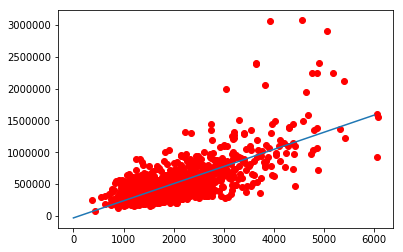

In [462]:
import matplotlib.pyplot as plt
plt.plot(sqft_living, price, 'ro')
plt.plot([0, 6000], [theta0, theta1 * 6000 + theta0])
plt.plot()
plt.show()

In [463]:
def pred(x):
    return theta0 + theta1 * x
predicted = [pred(sqft_living[i]) for i in range(0, n)]
mse = mean_squared_error(price, predicted)
r2 = r2_score(price, predicted)
rse = math.sqrt(mse)
print("MSE : {}, r^2 : {}, rse : {}".format(mse, r2, rse))

MSE : 57947526161.28836, r^2 : 0.49670880166311404, rse : 240722.92404606662


## Part B

In [477]:
from numpy import matmul
from numpy.linalg import inv
from numpy.linalg import norm
y = trainScaled["price"]
xPandas = trainScaled.drop(['price'], axis=1)
xPandas.insert(0, 0, 1)
X = xPandas.values
n = X.shape[0]
d = X.shape[1] - 1
XT = X.transpose()
theta = matmul(matmul(inv(matmul(XT, X)), XT), y)

In [478]:
theta

array([ 1.16683573e-13, -1.24298034e-02, -4.73053034e-02,  3.11743954e-01,
        4.64119237e-02,  6.66237278e-02,  1.88841504e-01,  1.38390601e-01,
        3.70339949e-02,  2.72721961e-01,  5.29109366e-02,  2.90411911e-02,
       -1.99349813e-01,  5.09001715e-02,  2.30979722e-01, -3.05082836e-03,
        1.34321094e-01, -3.81060382e-02])

# Part C

In [479]:
def pred(theta, x):
    return sum(theta * x)
predicted = [pred(theta, X[i]) for i in range(0, n)]
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
rse = math.sqrt(mse)
x_test_scaled = testScaled.drop(["price"], axis=1)
x_test_scaled.insert(0,0,1)
X_test = x_test_scaled.values
test_pred = [pred(theta, X_test[i]) for i in range(0,n)]
mse_test = mean_squared_error(y_test_scaled, test_pred)
r2_test = r2_score(y_test_scaled, test_pred)
rse_test = math.sqrt(mse_test)
print("MSE : {}, r^2 : {}, rse : {}".format(mse, r2, rse, mse_test))
print("MSE on test: {}, r^2 on test: {}, rse on test : {}".format(mse_test, r2_test, rse_test))

MSE : 0.2780124433924648, r^2 : 0.7217092658734054, rse : 0.5272688530460193
MSE on test: 0.5112846884712547, r^2 on test: 0.6465670281201799, rse on test : 0.7150417389714077


### Comparing closed form and package 
The coeffecients are more even from the closed form. They all have similar magnitudes than the package given ones where some features had much bigger coeffecients. This model has similar stats for the test data, but it still may have overfitted on the test data as the high r^2 and lower RSE may indicate that. The validation data still seemed to have fitted well however. 

# Problem 4

## Part A and B

In [475]:
def gradient(alpha, iterations, e=0.0001):
    theta = [0 for i in range(d+1)]
    count = 0
    def h(theta, i):
        return sum(theta * X[i])
    while count < iterations:
        norm = 0
        hVals = [h(theta, i) for i in range(n)]
        for j in range(d+1):
            val = 0
            for i in range(n):
                val += (hVals[i] - y[i]) * X[i,j]
            newTheta = theta[j] - alpha * (2/n) * (val)
            norm += (newTheta - theta[j])**2
            theta[j] = newTheta
        if math.sqrt(norm) < e:
            break
        count += 1
    return theta
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]
iterations = [15, 25, 50, 60, 100]
def mse_train(theta):
    return mean_squared_error(y, [pred(theta, X[i]) for i in range(0, n)])
def mse_test(theta):
    return mean_squared_error(y_test_scaled, [pred(theta, X_test[i]) for i in range(0, n)])
for alpha in alphas:
    for iteration in iterations:
        print("alpha: {}, number of iterations: {}".format(alpha, iteration))
        theta = gradient(alpha, iteration)
        print("theta: {}".format(str(theta)))
        print("MSE train: {}".format(mse_train(theta)))
        print("MSE test: {}".format(mse_test(theta)))

alpha: 0.01, number of iterations: 15
theta: [5.622649013048432e-15, 0.03927778691985031, 0.07040747854589939, 0.1174157241960177, 0.017307731270750852, 0.03239252097125081, 0.06962848731941493, 0.0884363452430802, 0.020922259905258412, 0.11047371576449541, 0.09279505367789762, 0.06862207724379565, -0.023997819931495464, 0.03360796982645111, 0.08469118923408267, -0.010461955533740427, 0.10759828141282586, 0.018807847427967678]
MSE train: 0.40318706042696695
MSE test: 0.688984262651524
alpha: 0.01, number of iterations: 25
theta: [1.2050683784181614e-14, 0.03719742605272535, 0.07684711216156895, 0.14194914389200616, 0.016155205127643818, 0.03453739126238882, 0.09699561669813177, 0.11637445028015378, 0.030772021040379374, 0.1369086967717433, 0.11028000231233023, 0.08629674582229521, -0.04882229505433592, 0.04684664828308554, 0.12122337630186948, -0.02266509826177874, 0.13071963629276884, 0.016870804590172667]
MSE train: 0.33887232477893003
MSE test: 0.5981706928180553
alpha: 0.01, number

theta: [1.1570402969063306e-13, -0.03690366883224948, 0.053701564132427056, 0.167600057952594, 0.028117413434311286, 0.023749414789156688, 0.18754419998323868, 0.14160250659285958, 0.03878696141731581, 0.2673052003573672, 0.14267203334092987, 0.08005139382093467, -0.19683027087172245, 0.051702086137140356, 0.23160119738595467, -0.004642950991090086, 0.13822026364383666, -0.034413529781304415]
MSE train: 0.27320686365519775
MSE test: 0.5002633578959712
alpha: 0.15, number of iterations: 60
theta: [1.161733043097968e-13, -0.036898708938784906, 0.05414259931101384, 0.1673745298887415, 0.029636929942911977, 0.023761914502386176, 0.1876739893221255, 0.14177353924184538, 0.03849753291250426, 0.2693709201156053, 0.1424314090525417, 0.08002890287301295, -0.19803854620396383, 0.05132315516209208, 0.2313024307142517, -0.0039192485388777135, 0.13655974035780113, -0.035805293134588675]
MSE train: 0.2731975967140817
MSE test: 0.5001502137352178
alpha: 0.15, number of iterations: 100
theta: [1.16565

## Part C

### Observations
I got virtually the same MSE as the closed form using 0.01 alpha and 100 iterations. The MSE matched both the training and testing set. Different learning rates greatly vary the MSE and as I increased the alpha, there was a stage where it seemed to stop converging as the learning rate probably made the descent jump over convergence point over and over again.  This caused the MSE to be very high as theta did not converge. The more iterations and smaller alpha gave best results, but it took much longer to run especially if convergence was not close to happening.

# Problem 5

## Part A
![5A](5a.jpg)

## Part B

In [485]:
from numpy import add
from numpy import identity
def ridge(l):
    lI = l * identity(d+1)
    return matmul(matmul(inv(add(matmul(XT, X), lI)), XT), y)
ls = [5000, 10000, 500, 100, 50, 0, 80, 60]
for l in ls:
    theta = ridge(l)
    predicted = [pred(theta, X[i]) for i in range(0, n)]
    mse = mean_squared_error(y, predicted)
    r2 = r2_score(y, predicted)
    rse = math.sqrt(mse)
    predicted_test = [pred(theta, X_test[i]) for i in range(0, n)]
    mseTest = mean_squared_error(y_test_scaled, predicted_test)
    r2Test = r2_score(y_test_scaled, predicted_test)
    rseTest = math.sqrt(mse)
    print("l = {}, MSE : {}, r^2 : {}, rse : {}".format(l, mse, r2, rse))
    print("test l = {}, MSE : {}, r^2 : {}, rse : {}".format(l, mseTest, r2Test, rseTest))

l = 5000, MSE : 0.548091625339674, r^2 : 0.45135973439471455, rse : 0.7403321047608796
test l = 5000, MSE : 0.8880610802039898, r^2 : 0.38611487129455513, rse : 0.7403321047608796
l = 10000, MSE : 0.680032000864685, r^2 : 0.3192872864217292, rse : 0.8246405282695515
test l = 10000, MSE : 1.0554861739577892, r^2 : 0.27037984189324016, rse : 0.8246405282695515
l = 500, MSE : 0.2980984886490465, r^2 : 0.7016031144654156, rse : 0.545983963728832
test l = 500, MSE : 0.5507787923922318, r^2 : 0.6192661547804021, rse : 0.545983963728832
l = 100, MSE : 0.27527222441881644, r^2 : 0.7244522278089895, rse : 0.5246639156820454
test l = 100, MSE : 0.5089028885264261, r^2 : 0.6482134819489478, rse : 0.5246639156820454
l = 50, MSE : 0.2738118124857615, r^2 : 0.7259141016158512, rse : 0.5232703053735818
test l = 50, MSE : 0.5042189992954668, r^2 : 0.6514512884551501, rse : 0.5232703053735818
l = 0, MSE : 0.2780124433924648, r^2 : 0.7217092658734054, rse : 0.5272688530460193
test l = 0, MSE : 0.5112846

### Comparing Ridge
The ridge regression fit better with smaller lambda values and caused the r^2 value to higher than the closed form or the package models. The MSE did not change that much, but this could mean the model also overfitted on the training set as well. The testing set shows that the model still fit well on the validation set equivalent to the package and closed form solutions.